In [1]:
from pynamicalsys import DiscreteDynamicalSystem as dds
from pynamicalsys import PlotStyler

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
from string import ascii_lowercase
from joblib import Parallel, delayed

# Basic system definition and simulation

In [3]:
dds.available_models()

['standard map',
 'unbounded standard map',
 'henon map',
 'lozi map',
 'rulkov map',
 'logistic map',
 'standard nontwist map',
 'extended standard nontwist map',
 'leonel map',
 '4d symplectic map']

## Standard map

In [4]:
ds = dds(model="standard map")

In [5]:
u = [0.05, 0.05] # initial condition
k = 1.5 # parameter for the standard map
total_time = 1000000 # total iteration time for each trajectory

In [ ]:
%%time
trajectory = ds.trajectory(u, total_time, parameters=k)

CPU times: user 46.8 ms, sys: 1.7 ms, total: 48.5 ms
Wall time: 48.9 ms


In [8]:
trajectory.shape

(1000000, 2)

In [9]:
num_ic = 200 # number of initial conditions
np.random.seed(13) # for reproducibility
u = np.random.rand(num_ic, 2) # random initial conditions
k = 1.5 # parameter for the standard map
total_time = 100000 # total iteration time for each trajectory

In [10]:
%%time
trajectories = ds.trajectory(u, total_time, parameters=k)

CPU times: user 1.31 s, sys: 59.6 ms, total: 1.37 s
Wall time: 429 ms


In [11]:
trajectories.shape

(20000000, 2)

In [12]:
trajectories = trajectories.reshape(num_ic, total_time, 2)

In [13]:
import seaborn as sns
colors = sns.color_palette("hls", num_ic)
np.random.seed(13) # for reproducibility
np.random.shuffle(colors) # shuffle the colors

<Figure size 640x480 with 0 Axes>

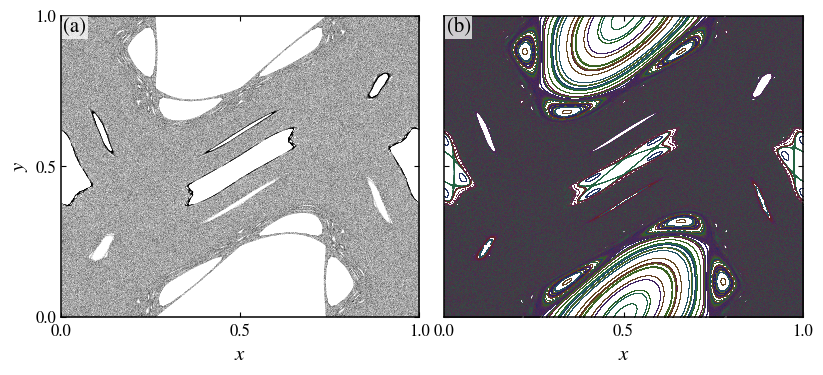

In [15]:
fontsize = 15
ps = PlotStyler(fontsize=fontsize, axes_linewidth=1.1)
ps.apply_style()
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3.5))
ps.set_tick_padding(ax[0], pad_x=5)
ps.set_tick_padding(ax[1], pad_x=5)

ax[0].plot(trajectory[:, 0], trajectory[:, 1], 'ko', markersize=0.1, markeredgewidth=0.0)

for i in range(num_ic):
    ax[1].plot(trajectories[i, :, 0], trajectories[i, :, 1], 'o', color=colors[i], markersize=0.2, markeredgewidth=0.0)

xbox = 0.0067
ybox = 0.9457
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(2):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")
ax[1].set_xlabel(r"$x$")
plt.subplots_adjust(left=0.058, bottom=0.12, right=0.985, top=0.98, wspace=0.07, hspace=0.2)
plt.savefig("fig1.png", dpi=400)

## Hénon map

In [16]:
ds = dds(model="henon map")

In [17]:
info = ds.info
info["parameters"]

['a', 'b']

In [18]:
u = [0.1, 0.1] # initial condition
a, b = 1.4, 0.3 # parameters for the Henon map
parameters = [a, b]
total_time = 1000000 # total iteration time for each trajectory
transient_time = 500000 # transient time for the Henon map

In [19]:
%%time
trajectory = ds.trajectory(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 237 ms, sys: 23.7 ms, total: 261 ms
Wall time: 283 ms


In [20]:
trajectory.shape

(500000, 2)

In [21]:
u = [0.1, 0.1] # initial condition
# We are going to change the parameter a and keep b fixed at
b = 0.3
# We define the parameter array with only the b value because a is going to be changed
parameters = b
# Define the parameter range
param_range = np.linspace(1, 1.4, 2500)
# Define which parameter will be changed
param_index = 0 # The parameter is the first one (parameters = [a, b])
# Define the total number of iterations (including the transient)
total_time = 8000
# Define the transient iterations
transient_time = 2000

In [23]:
%%time
param_values, bifurcation_diagram = ds.bifurcation_diagram(u, param_index, param_range, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 3.08 s, sys: 36.9 ms, total: 3.12 s
Wall time: 3.14 s


<Figure size 640x480 with 0 Axes>

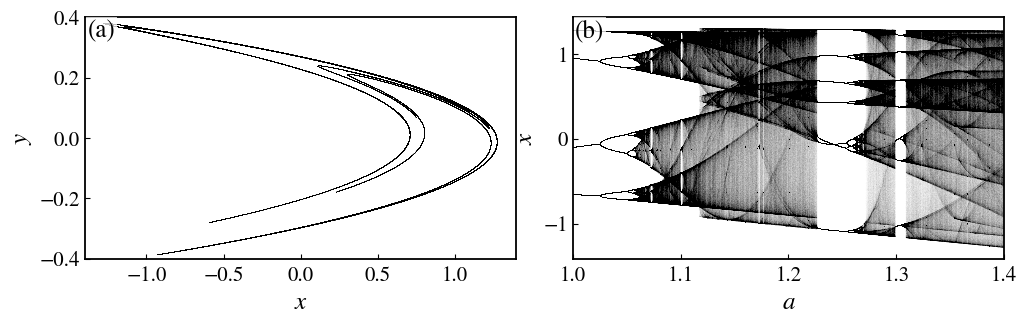

In [ ]:
fontsize = 18
ps = PlotStyler(fontsize=fontsize)
ps.apply_style()
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ps.set_tick_padding(ax[0], pad_x=5)
ps.set_tick_padding(ax[1], pad_x=5)
ax[0].plot(trajectory[:, 0], trajectory[:, 1], 'ko', markersize=0.2, markeredgewidth=0.0)
ax[0].set_xlim(-1.4, 1.4)
ax[0].set_ylim(-.4, .4)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")

for i in range(bifurcation_diagram.shape[0]):
    ax[1].scatter(param_values[i] * np.ones_like(bifurcation_diagram[i, :]), bifurcation_diagram[i, :], c="k", s=0.005, edgecolors="none")

ax[1].set_xlim(param_values.min(), param_values.max())
ax[1].set_xlabel(r"$a$")
ax[1].set_ylabel(r"$x$")

xbox = 0.006
ybox = 0.919
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(2):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)
plt.subplots_adjust(left=0.068, bottom=0.17, right=0.9875, top=0.975, wspace=0.13)
plt.savefig("fig2.png", dpi=400)

# Chaotic indicators

## Lyapunov exponents

### Final value

In [24]:
from numba import njit

In [25]:
@njit
def dakrm(u, parameters):
    k, a, gamma = parameters
    x, y = u

    y_new = (1 - gamma) * y + k * (np.sin(x) + a * np.sin(2 * x + np.pi / 2))
    x_new = (x + y_new) % (2 * np.pi)
    return np.array([x_new, y_new])

@njit
def dakrm_jacobian(u, parameters, *args):
    k, a, gamma = parameters
    x, y = u

    dFdx = k * (np.cos(x) + 2 * a * np.cos(2 * x + np.pi / 2))
    dFdy = 1 - gamma

    return np.array([
        [1 + dFdx, dFdy],
        [dFdx,     dFdy]
    ])

In [33]:
ds = dds(mapping=dakrm, jacobian=dakrm_jacobian, system_dimension=2, number_of_parameters=3)

In [34]:
# Initial condition
u = np.array([1.78, 0.0])
# Parameters
gamma = 0.8
grid_size = 1000
k = np.linspace(0, 30, grid_size)
a = np.linspace(0, 1, grid_size)
K, A = np.meshgrid(k, a)
# Total number of iterations (including the transient)
total_time = 10000
# Transient iterations
transient_time = 5000

In [35]:
k = 8
a = 0.47
gamma = 0.8
parameters = [k, a, gamma]

In [37]:
%%time
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 3.92 ms, sys: 58 μs, total: 3.97 ms
Wall time: 4.15 ms


array([-0.35202562, -1.25741229])

In [38]:
ds.period(u, total_time, parameters=parameters, transient_time=transient_time)

2

In [39]:
k = 8
a = 0.6
gamma = 0.8
parameters = np.array([k, a, gamma])

In [40]:
%%time
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 2.16 ms, sys: 36 μs, total: 2.19 ms
Wall time: 2.28 ms


array([ 1.57224186, -3.18167977])

In [41]:
ds.period(u, total_time, parameters=parameters, transient_time=transient_time)

-1

In [42]:
ds = dds(mapping=dakrm, system_dimension=2, number_of_parameters=3)

In [43]:
# Initial condition
u = np.array([1.78, 0.0])
# Parameters
k = 8
a = 0.6
gamma = 0.8
parameters = np.array([k, a, gamma])
# Total number of iterations (including the transient)
total_time = 10000
# Transient iterations
transient_time = 5000

In [44]:
%%time
ds.lyapunov(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 413 ms, sys: 8.68 ms, total: 422 ms
Wall time: 444 ms


array([ 1.5740678 , -3.18114158])

In [45]:
%%time
lyapunov = np.array(Parallel(n_jobs=-1)(delayed(ds.lyapunov)(u, total_time, parameters=np.array([K[i, j], A[i, j], gamma]), transient_time=1000) for i in range(grid_size) for j in range(grid_size)))

CPU times: user 2min 24s, sys: 7.93 s, total: 2min 32s
Wall time: 25min 31s


In [46]:
lyapunov.shape

(1000000, 2)

In [50]:
%%time
period = np.array(Parallel(n_jobs=-1)(delayed(ds.period)(u, total_time, parameters=np.array([k_val, a_val, gamma]), transient_time=transient_time) for k_val, a_val in zip(K.flatten(), A.flatten())))

CPU times: user 42 s, sys: 1.59 s, total: 43.6 s
Wall time: 7min 56s


In [54]:
import seaborn as sns
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

<Figure size 640x480 with 0 Axes>

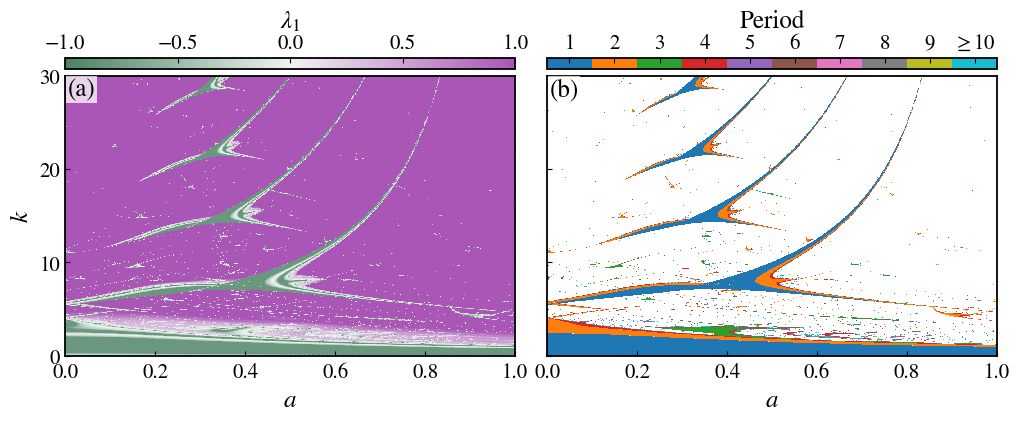

In [55]:
ps = PlotStyler(fontsize=18, ticks_on_all_sides=False)
ps.apply_style()
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
ps.set_tick_padding(ax[0], pad_x=5)
ps.set_tick_padding(ax[1], pad_x=5)

hm = ax[0].pcolor(A, K, lyapunov[:, 0].reshape((grid_size, grid_size)), cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(hm, aspect=40, pad=0.02, label=r'$\lambda_1$', location="top")
ax[0].set_xlabel(r'$a$')
ax[0].set_ylabel(r'$k$')


aux_period = np.asarray(period, dtype=np.float64).reshape(grid_size, grid_size)
aux_period[np.where(aux_period == -1)] = np.nan
cmaplist = sns.color_palette("tab10", 10)
cmap = mpl.colors.ListedColormap(cmaplist)
bounds = np.linspace(0.5, 10.5, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
hm = ax[1].pcolormesh(A, K, aux_period, cmap=cmap, norm=norm)
ticks = np.arange(1, 11, 1)
cbar = plt.colorbar(hm, ticks=ticks, label="Period", aspect=40, pad=0.02, location="top")
ticks = list(ticks)
ticks[-1] = "$\\geq 10$"
cbar.ax.set_xticklabels(ticks)
cbar.ax.minorticks_off()
ax[1].set_xlabel(r'$a$')

xbox = 0.0058
ybox = 0.93
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(2):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

plt.subplots_adjust(left=0.055, bottom=0.125, right=0.987, top=0.9675, wspace=0.07)
plt.savefig("fig3.png", dpi=400)

### Whole history

In [3]:
ds = dds(model="standard map")

In [4]:
k = 0.9
total_time = 1000000
u = np.array([[0.26, 0.0],
              [0.4, 0.],
              [0, 0.45],
              [0.1, 0.25],
              [0.1, 0.68],
              [0.06, 0.05],
              [0, 0.3],
              [0, 0.6],
              [0, 0.7]])
num_ic = u.shape[0] # number of initial conditions

In [7]:
%%time
ts = ds.trajectory(u, total_time, parameters=k)

CPU times: user 932 ms, sys: 81.2 ms, total: 1.01 s
Wall time: 682 ms


In [8]:
ts = ts.reshape(num_ic, total_time, 2)

In [20]:
total_time = 100000000
sample_times = np.unique(np.logspace(np.log10(1), np.log10(total_time), 1000).astype(int))

In [21]:
%%time
lyapunovs = np.array(Parallel(n_jobs=-1)(delayed(ds.lyapunov)(u[i], total_time, parameters=k, return_history=True, sample_times=sample_times) for i in range(num_ic)))

CPU times: user 147 ms, sys: 50.4 ms, total: 197 ms
Wall time: 2min 29s


In [22]:
lyapunovs.shape

(9, 836, 2)

<Figure size 640x480 with 0 Axes>

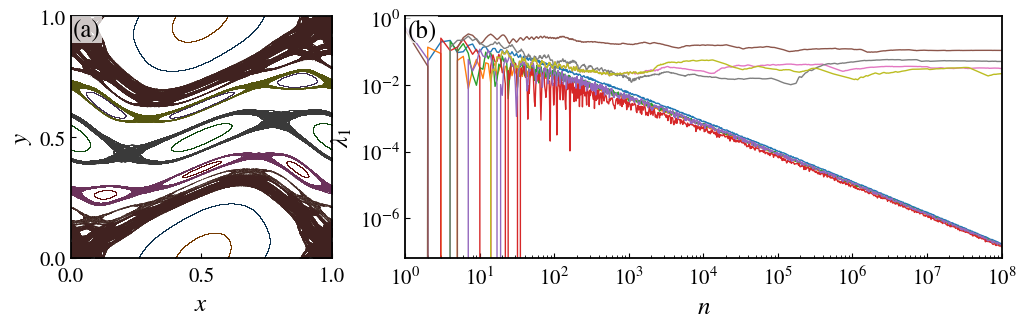

In [23]:
ps = PlotStyler(fontsize=18, ticks_on_all_sides=False, markersize=0.2, markeredgewidth=0)
ps.apply_style()
# Create figure
fig = plt.figure(figsize=(10, 3))
colors = sns.color_palette("tab10", num_ic)
# Create GridSpec with 1 row and 3 columns
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax = np.array([ax1, ax2], dtype=object)
[ps.set_tick_padding(ax[i], pad_x=6) for i in range(ax.shape[0])]


for i in range(num_ic):
    ax[0].plot(ts[i, :, 0], ts[i, :, 1], 'o', color=colors[i])
    ax[1].plot(sample_times, lyapunovs[i, :, 0], '-', color=colors[i])

ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])

ax[1].set_xlabel(r"$n$")
ax[1].set_ylabel(r"$\lambda_1$")
ax[1].set_xlim(sample_times[0], sample_times[-1])
ax[1].set_yscale("log")
ax[1].set_xscale("log")

xbox = [0.01003, 0.004]
ybox = [0.919, 0.919]
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(2):
    ax[i].text(xbox[i], ybox[i], f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

plt.subplots_adjust(left=0.054, bottom=0.165, right=0.985, top=0.97, wspace=0.28, hspace=0.2)

plt.savefig("fig4.png", dpi=400)

### Finite-time Lyapunov exponent

In [45]:
ds = dds(model="standard map")

In [46]:
u = [0.5, 0.25]
nk = 5000
k = np.linspace(0, 5, nk)
total_time = 5000

In [ ]:
%%time
lypnvs_vs_k = np.array([ds.lyapunov(u, total_time, parameters=k[i]) for i in range(nk)])

CPU times: user 9.49 s, sys: 56 ms, total: 9.55 s
Wall time: 9.56 s


In [48]:
u = [0.05, 0.05]
parameter = 1.5
# The total number of iterations for the FTRTE computation is
total_time = 100000000
# and the size of the windows is
finite_time = 200

In [49]:
%%time
ftle = ds.finite_time_lyapunov(u, total_time, finite_time, parameters=parameter)

CPU times: user 38.8 s, sys: 204 ms, total: 39 s
Wall time: 39 s


In [50]:
total_time = 2000000
# and the size of the windows is
finite_time = 200

In [51]:
%%time
_, points = ds.finite_time_lyapunov(u, total_time, finite_time, parameters=parameter, return_points=True)

CPU times: user 839 ms, sys: 36.3 ms, total: 875 ms
Wall time: 846 ms


In [52]:
ts = ds.trajectory(points, finite_time, parameters=parameter)
ts = ts.reshape(points.shape[0], finite_time, 2)

<Figure size 640x480 with 0 Axes>

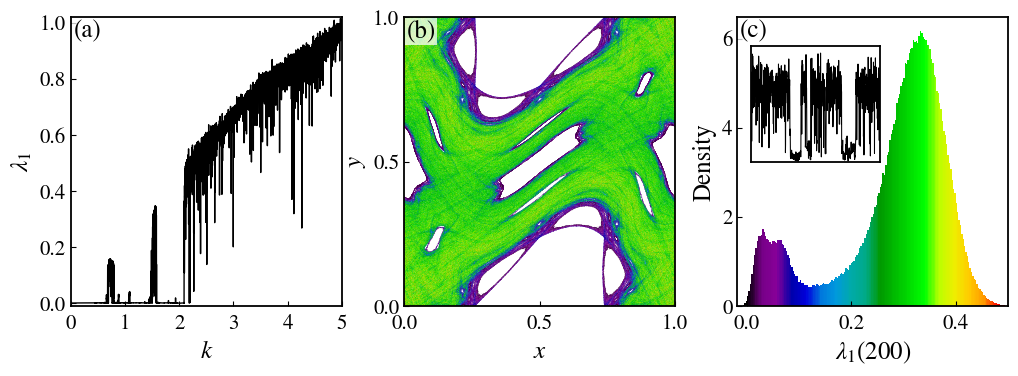

In [55]:
fontsize = 18
ps = PlotStyler(fontsize=18, ticks_on_all_sides=False)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5))
[ps.set_tick_padding(ax[i], pad_x=6) for i in range(ax.shape[0])]


ax[0].plot(k, lypnvs_vs_k[:, 0], "k")
ax[0].set_xlim(k.min(), k.max())
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xlabel("$k$")
ax[0].set_ylabel(r"$\lambda_1$")
ax[0].set_ylim(-0.01, 1.02)

for i in range(points.shape[0]):
    ax[1].scatter(ts[i, :, 0], ts[i, :, 1], c=ftle[i, 0] * np.ones(finite_time), cmap="nipy_spectral", s=0.05, edgecolors="none", vmin=0, vmax=ftle[:, 0].max())
    
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])

counts, bins, patches = ax[2].hist(ftle[:, 0], bins="auto", edgecolor='none', density=True)
# Compute bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Normalize bin centers for colormap
norm = plt.Normalize(0, bin_centers.max())
colormap = cm.nipy_spectral  # You can choose any colormap you like

# Apply color based on bin center (x position)
for center, patch in zip(bin_centers, patches):
    color = colormap(norm(center))
    patch.set_facecolor(color)

ax[2].set_xlim(bins[0], 0.5)
ax[2].set_xlabel(r"$\lambda_1(200)$")
ax[2].set_ylabel("Density")

ax_ins = ax[2].inset_axes([0.05, 0.5, 0.475, 0.4])  # [left, bottom, width, height]

ii = np.arange(ftle.shape[0]) / 1e3
ax_ins.plot(ii, ftle[:, 0], "k", lw=0.75)
ax_ins.set_xlim(1, 2)
ax_ins.set_ylim(0, 0.5)
ax_ins.set_xticks([])
ax_ins.set_yticks([])

xbox = 0.0095
ybox = 0.9318
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
for i in range(3):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)
plt.subplots_adjust(left=0.06, bottom=0.15, right=0.9975, top=0.975, wspace=0.23, hspace=0.2)

plt.savefig("fig5.png", dpi=400)

## Linear dependence index

In [7]:
ds = dds(model="4D symplectic map")

In [8]:
info = ds.info()
info["parameters"]

['eps1', 'eps2', 'xi']

In [9]:
u = np.array([[0.5, 0.0, 0.5, 0.0],
              [3.0, 0.0, 0.5, 0.0]])
parameters = np.array([0.5, 0.1, 0.001], dtype=np.float64)
total_time = int(1e6)
sample_times = np.unique(np.logspace(np.log10(1), np.log10(total_time), 5000).astype(int))

In [ ]:
%%time
lyapunovs = np.array(Parallel(n_jobs=-1)(delayed(ds.lyapunov)(u[i], total_time, parameters=parameters, return_history=True, sample_times=sample_times) for i in range(u.shape[0])))

CPU times: user 34.9 ms, sys: 109 ms, total: 144 ms
Wall time: 9.58 s


In [11]:
lyapunovs.shape

(2, 3229, 4)

In [12]:
k = [2, 3, 4]
total_time = int(1e5)
times = np.arange(1, total_time + 1)
ldi = np.zeros((u.shape[0], total_time, len(k)))

In [ ]:
%%time
for i in range(len(k)):
    for j in range(u.shape[0]):
        ldi[j, :, i] = ds.LDI(u[j], total_time, k[i], parameters=parameters, return_history=True)

/opt/anaconda3/lib/python3.12/site-packages/numba/core/utils.py:661: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/opt/anaconda3/lib/python3.12/site-packages/numba/core/utils.py:661: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


CPU times: user 9.77 s, sys: 90.4 ms, total: 9.86 s
Wall time: 9.91 s


In [14]:
ldi.shape

(2, 100000, 3)

<Figure size 640x480 with 0 Axes>

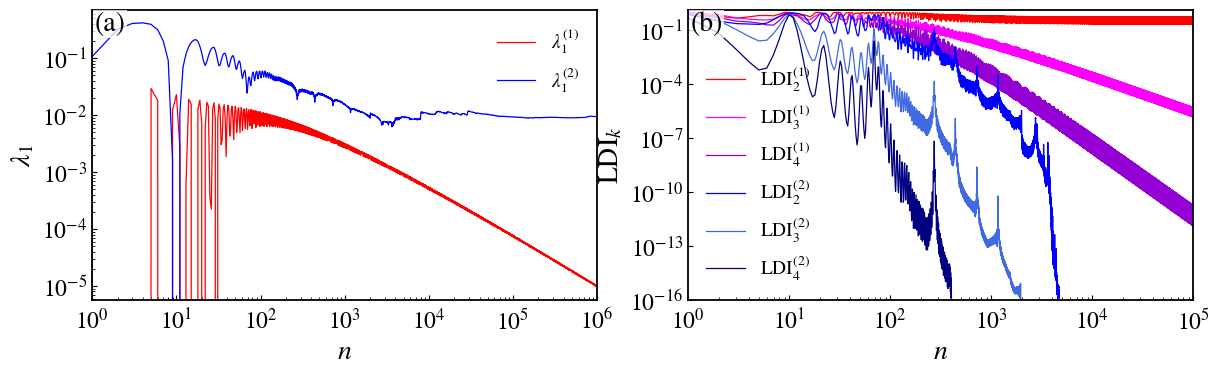

In [ ]:
ps = PlotStyler(fontsize=20, ticks_on_all_sides=False)
ps.apply_style()
fig, ax = plt.subplots(1, 2, figsize=(12, 3.5))
ps.set_tick_padding(ax[0], pad_x=5)
ps.set_tick_padding(ax[1], pad_x=5)

ax[0].plot(sample_times, lyapunovs[0, :, 0], '-', color="red", lw=0.9, label=r"$\lambda_1^{(1)}$")
ax[0].plot(sample_times, lyapunovs[1, :, 0], '-', color="blue", lw=0.9, label=r"$\lambda_1^{(2)}$")

colors = [['r', 'r', 'fuchsia', 'darkviolet'],
          ['b', 'b', 'royalblue', 'navy']]
for i in range(u.shape[0]):
    ax[1].plot(times, ldi[i, :, 0], "-", color=colors[i][1], lw=0.9, label=f"LDI$_2^{{({i + 1})}}$")
    ax[1].plot(times, ldi[i, :, 1], "-", color=colors[i][2], lw=0.9, label=f"LDI$_3^{{({i + 1})}}$")
    ax[1].plot(times, ldi[i, :, 2], "-", color=colors[i][3], lw=0.9, label=f"LDI$_4^{{({i + 1})}}$")

ax[0].legend(loc="upper right", frameon=False)
ax[1].legend(loc="lower left", frameon=False)

ax[0].set_xlim(sample_times[0], sample_times[-1])
ax[0].set_xlabel(r"$n$")
ax[0].set_ylabel(r"$\lambda_1$")
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].set_xlim(times[0], times[-1])
ax[1].set_ylim(1e-16, np.sqrt(2))
ax[1].set_xlabel(r"$n$")
ax[1].set_ylabel(r"LDI$_k$")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

xbox = 0.0049
ybox = 0.9265
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(2):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

plt.subplots_adjust(left=0.0675, bottom=0.16, right=0.985, top=0.99, wspace=0.18, hspace=0.2)
plt.savefig("fig5.png", dpi=400)

In [16]:
total_time = 1000
nruns = 500
from time import time

In [ ]:
exe_times = []
for _ in range(nruns):
    time_ini = time()
    ds.LDI(u[0], total_time, 2, parameters=parameters)
    time_end = time()
    exe_times.append(time_end - time_ini)
LDI_time = np.mean(exe_times)
print(f"Execution time for LDI: {np.mean(exe_times):.5f} +- {np.std(exe_times):.5f} seconds")

Execution time for LDI: 0.02749 +- 0.00064 seconds


In [ ]:
exe_times = []
for _ in range(nruns):
    time_ini = time()
    ds.SALI(u[0], total_time, parameters=parameters)
    time_end = time()
    exe_times.append(time_end - time_ini)
SALI_time = np.mean(exe_times)
print(f"Execution time for SALI: {np.mean(exe_times):.6f} +- {np.std(exe_times):.6f} seconds")

Execution time for SALI: 0.002777 +- 0.041096 seconds


In [19]:
LDI_time, SALI_time, LDI_time / SALI_time

(0.027492702960968018, 0.002777045249938965, 9.899983790891511)

## Weighted Birkhoff averagas

In [3]:
ds = dds(model="standard map")

In [ ]:
k = 1.5
y = np.linspace(0, 1, 20001)
x = 0.5 * np.ones_like(y)
u = np.array([x, y]).T
total_time = 10000

In [ ]:
%%time
dig = np.array([ds.dig(u[i], total_time, parameters=k) for i in range(u.shape[0])])

/Users/mrolims/Library/CloudStorage/Dropbox/Física/Pesquisa/pycandy/src/pycandy/dynamical_indicators.py:528: RuntimeWarning: divide by zero encountered in log10
  return - np.log10(abs(WB0 - WB1))


CPU times: user 8.47 s, sys: 179 ms, total: 8.65 s
Wall time: 8.66 s


In [ ]:
%%time
dig2 = np.array([ds.dig(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * x[:, 0])) for i in range(u.shape[0])])

CPU times: user 8.56 s, sys: 180 ms, total: 8.74 s
Wall time: 8.76 s


In [ ]:
%%time
dig3 = np.array([ds.dig(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * (x[:, 0] + x[:, 1]))) for i in range(u.shape[0])])

CPU times: user 8.64 s, sys: 138 ms, total: 8.78 s
Wall time: 8.79 s


In [231]:
grid_size = 1000
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x, y)
u = np.array([X.flatten(), Y.flatten()]).T
k = 1.5
N = 10000

In [ ]:
%%time
dig = np.array(Parallel(n_jobs=-1)(delayed(ds.dig)(u[i], total_time, parameters=k) for i in range(u.shape[0])))

/Users/mrolims/Library/CloudStorage/Dropbox/Física/Pesquisa/pycandy/src/pycandy/dynamical_indicators.py:528: RuntimeWarning: divide by zero encountered in log10
  return - np.log10(abs(WB0 - WB1))
/Users/mrolims/Library/CloudStorage/Dropbox/Física/Pesquisa/pycandy/src/pycandy/dynamical_indicators.py:528: RuntimeWarning: divide by zero encountered in log10
  return - np.log10(abs(WB0 - WB1))
/Users/mrolims/Library/CloudStorage/Dropbox/Física/Pesquisa/pycandy/src/pycandy/dynamical_indicators.py:528: RuntimeWarning: divide by zero encountered in log10
  return - np.log10(abs(WB0 - WB1))
/Users/mrolims/Library/CloudStorage/Dropbox/Física/Pesquisa/pycandy/src/pycandy/dynamical_indicators.py:528: RuntimeWarning: divide by zero encountered in log10
  return - np.log10(abs(WB0 - WB1))


CPU times: user 28.2 s, sys: 877 ms, total: 29 s
Wall time: 1min 36s


In [233]:
dig = dig.reshape(grid_size, grid_size)

In [ ]:
%%time
dig2 = np.array(Parallel(n_jobs=-1)(delayed(ds.dig)(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * x[:, 0])) for i in range(u.shape[0])))

CPU times: user 4min 37s, sys: 2.84 s, total: 4min 40s
Wall time: 4min 40s


In [180]:
dig2 = dig2.reshape(grid_size, grid_size)

In [181]:
dig2.shape

(1000, 1000)

In [ ]:
%%time
dig3 = np.array(Parallel(n_jobs=-1)(delayed(ds.dig)(u[i], total_time, parameters=k, func=lambda x: np.sin(2 * np.pi * (x[:, 0] + x[:, 1]))) for i in range(u.shape[0])))

CPU times: user 5min 13s, sys: 3.75 s, total: 5min 17s
Wall time: 5min 18s


In [183]:
dig3 = dig3.reshape(grid_size, grid_size)

In [234]:
# Remove inf from dig: substitute with the mean of the neighbors
def remove_inf(dig):
    dig[np.isinf(dig)] = np.nan
    for i in range(dig.shape[0]):
        for j in range(dig.shape[1]):
            if np.isnan(dig[i, j]):
                neighbors = []
                if i > 0:
                    neighbors.append(dig[i - 1, j])
                if i < dig.shape[0] - 1:
                    neighbors.append(dig[i + 1, j])
                if j > 0:
                    neighbors.append(dig[i, j - 1])
                if j < dig.shape[1] - 1:
                    neighbors.append(dig[i, j + 1])
                dig[i, j] = np.nanmean(neighbors)
    return dig
dig_ri = remove_inf(dig)
dig2_ri = remove_inf(dig2)
dig3_ri = remove_inf(dig3)

<Figure size 640x480 with 0 Axes>

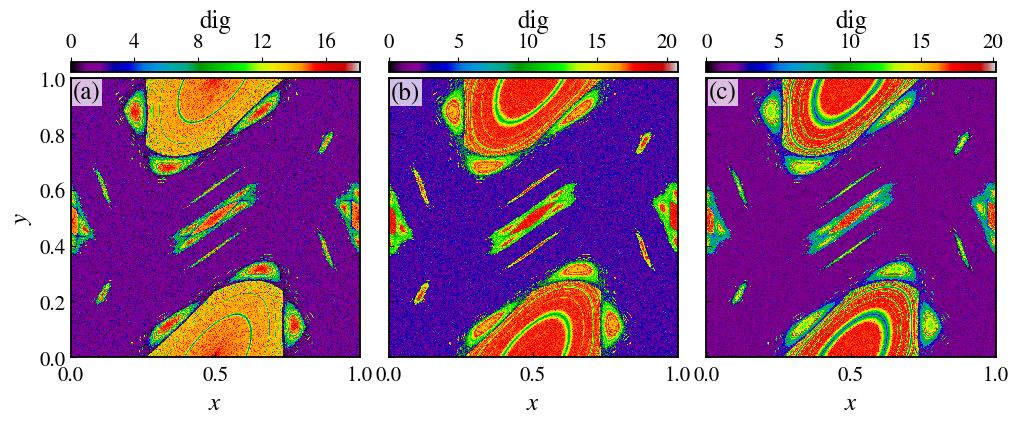

In [ ]:
ps = PlotStyler(fontsize=18, ticks_on_all_sides=False)
ps.apply_style()

fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
ps.set_tick_padding(ax[0], pad_x=6)
ps.set_tick_padding(ax[1], pad_x=6)
ps.set_tick_padding(ax[2], pad_x=6)

cmap = "nipy_spectral" 
# cmap = sns.color_palette("magma", as_cmap=True)
hm = ax[0].pcolor(X, Y, dig_ri, cmap=cmap, vmin=0, vmax=dig_ri.max())
cbar = plt.colorbar(hm, aspect=30, pad=0.02, label="dig", location="top")
cbar.ax.set_xticks([0, 4, 8, 12, 16])
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")

hm = ax[1].pcolor(X, Y, dig2_ri, cmap=cmap, vmin=0, vmax=dig2_ri.max())
cbar = plt.colorbar(hm, aspect=30, pad=0.02, label="dig", location="top")
cbar.ax.set_xticks([0, 5, 10, 15, 20])
ax[1].set_xlabel(r"$x$")
hm = ax[2].pcolor(X, Y, dig3_ri, cmap=cmap, vmin=0, vmax=dig3_ri.max())
cbar = plt.colorbar(hm, aspect=30, pad=0.02, label="dig", location="top")
cbar.ax.set_xticks([0, 5, 10, 15, 20])
ax[2].set_xlabel(r"$x$")

xbox = 0.009
ybox = 0.9298
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}

for i in range(3):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

plt.subplots_adjust(left=0.06, bottom=0.13, right=0.985, top=0.97, wspace=0.1, hspace=0.2)

plt.savefig("fig6.png", dpi=400)

## Recurrence time entropy

In [3]:
ds = dds(model="standard map")

### Recurrence matrix

In [4]:
u = [[0.05, 0.05],
     [0.35, 0.0],
     [0.42, 0.2]]
k = 1.5
total_time = 1000

In [ ]:
%%time
recmats = [ds.recurrence_matrix(u[i], total_time, parameters=k) for i in range(len(u))]

CPU times: user 3.33 ms, sys: 1.43 ms, total: 4.76 ms
Wall time: 4.04 ms


In [ ]:
N = 250000
ts = ds.trajectory(u, total_time, parameters=k)
ts = ts.reshape(len(u), N, 2)

<Figure size 640x480 with 0 Axes>

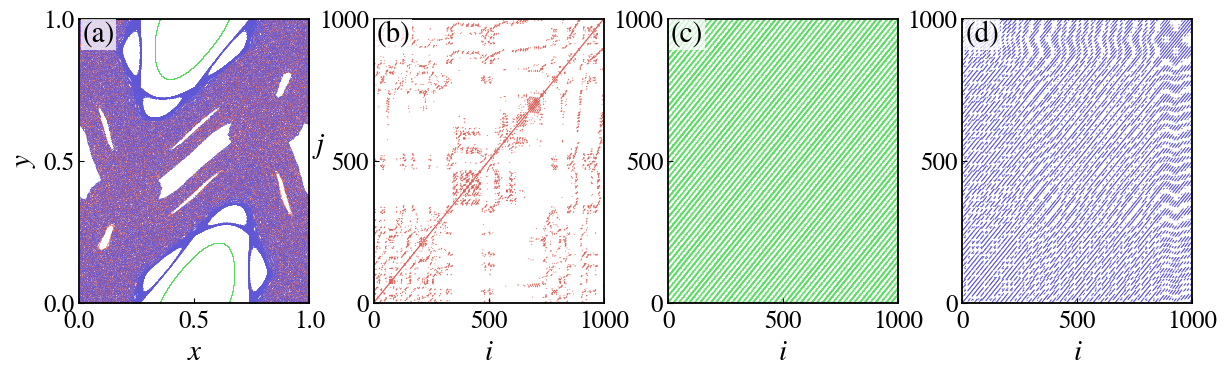

In [ ]:
ps = PlotStyler(fontsize=21, ticks_on_all_sides=False)
ps.apply_style()

fig, ax = plt.subplots(1, 4, figsize=(12, 3.5))
ps.set_tick_padding(ax[0], pad_x=5)
ps.set_tick_padding(ax[1], pad_x=5)
ps.set_tick_padding(ax[2], pad_x=5)
ps.set_tick_padding(ax[3], pad_x=5)


colors = sns.color_palette("hls", len(u))


for i in range(len(u)):
    # ax[0].scatter(u[i][0], u[i][1], c=colors[i], s=10, edgecolors="none")
    ax[0].plot(ts[i, :, 0], ts[i, :, 1], 'o', markersize=0.3, markeredgewidth=0.0, color=colors[i])
    x = np.where(recmats[i] == 1)[0]
    y = np.where(recmats[i] == 1)[1]
    
    ax[1 + i].scatter(x, y, s=0.5, color=colors[i], edgecolors="none")
    ax[1 + i].set_xlim(0, total_time)
    ax[1 + i].set_ylim(0, total_time)
    ax[1 + i].set_xlabel(r"$i$")
    ax[i + 1].set_yticks([0, 500, 1000])
    ax[i + 1].set_xticks([0, 500, 1000])
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
label = ax[1].set_ylabel(r"$j$", rotation=0, labelpad=0.1)
# label.set_position((1, 0.6))  # (x, y) in axis coordinates
# ax[2].set_yticklabels([])
# ax[3].set_yticklabels([])

xbox = 0.012
ybox = 0.921
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
for i in range(4):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)

plt.subplots_adjust(left=0.0525, bottom=0.161, right=0.98, top=0.972, wspace=0.28, hspace=0.2)

plt.savefig("fig8.png", dpi=400)

In [6]:
u = [0.5, 0.25]
nk = 5000
k = np.linspace(0, 5, nk)
total_time = 5000

In [7]:
%%time
rte = Parallel(n_jobs=-1)(delayed(ds.recurrence_time_entropy)(u, total_time, parameters=k[i]) for i in range(k.shape[0]))
rte = np.array(rte)

CPU times: user 2.8 s, sys: 148 ms, total: 2.95 s
Wall time: 19.2 s


In [9]:
u = [0.05, 0.05]
parameter = 1.5
# The total number of iterations for the FTRTE computation is
total_time = 100000000
# and the size of the windows is
finite_time = 200

In [11]:
%%time
ftrte = ds.finite_time_recurrence_time_entropy(u, total_time, finite_time, parameters=parameter)

CPU times: user 34.8 s, sys: 264 ms, total: 35.1 s
Wall time: 35.2 s


In [39]:
total_time = 2000000
# and the size of the windows is
finite_time = 200

In [40]:
%%time
_, points = ds.finite_time_recurrence_time_entropy(u, total_time, finite_time, parameters=parameter, return_points=True)

CPU times: user 796 ms, sys: 77.6 ms, total: 874 ms
Wall time: 804 ms


In [41]:
ts = ds.trajectory(points, finite_time, parameters=parameter)
ts = ts.reshape(len(points), finite_time, 2)

<Figure size 640x480 with 0 Axes>

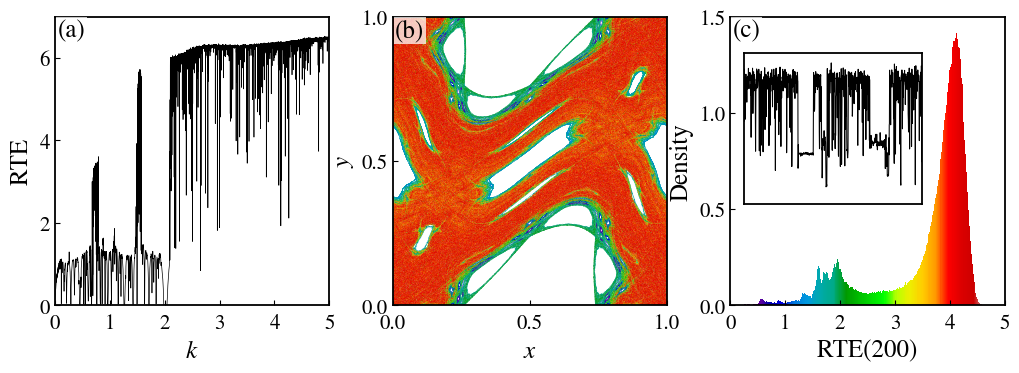

In [44]:
fontsize = 18
ps = PlotStyler(fontsize=fontsize, ticks_on_all_sides=False)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5))
[ps.set_tick_padding(ax[i], pad_x=6) for i in range(ax.shape[0])]

ax[0].plot(k, rte, "k", lw=0.5)
ax[0].set_xlim(k.min(), k.max())
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_ylim(0, 7)
ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"RTE")

for i in range(points.shape[0]):
    ax[1].scatter(ts[i, :, 0], ts[i, :, 1], c=ftrte[i] * np.ones(finite_time), cmap="nipy_spectral", s=0.05, edgecolors="none", vmin=0, vmax=ftrte.max())
    
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])

counts, bins, patches = ax[2].hist(ftrte, bins="auto", edgecolor='none', density=True)
# Compute bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Normalize bin centers for colormap
norm = plt.Normalize(0, bin_centers.max())
colormap = cm.nipy_spectral  # You can choose any colormap you like

# Apply color based on bin center (x position)
for center, patch in zip(bin_centers, patches):
    color = colormap(norm(center))
    patch.set_facecolor(color)

ax[2].set_xlim(bins[0], bins[-1])
ax[2].set_xlabel(r"RTE(200)")
ax[2].set_ylabel("Density")
ax[2].set_xticks([0, 1, 2, 3, 4, 5])
ax[2].set_yticks([0, 0.5, 1, 1.5])

ax_ins = ax[2].inset_axes([0.05, 0.35, 0.65, 0.525])  # [left, bottom, width, height]
ii = np.arange(ftrte.shape[0]) / 1e3
ax_ins.plot(ii, ftrte, "k", lw=0.75)
ax_ins.set_xlim(1, 2)
ax_ins.set_xticks([])
ax_ins.set_yticks([])

xbox = 0.0095
ybox = 0.9318
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
for i in range(3):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)
plt.subplots_adjust(left=0.045, bottom=0.15, right=0.995, top=0.975, wspace=0.23, hspace=0.2)
plt.savefig("fig9.png", dpi=400)

## Hurst exponent

In [56]:
ds = dds(model="standard map")

In [60]:
u = [0.5, 0.25]
nk = 5000
k = np.linspace(0, 5, nk)
total_time = 5000

In [61]:
%%time
HE = Parallel(n_jobs=-1)(delayed(ds.hurst_exponent)(u, total_time, parameters=k[i]) for i in range(k.shape[0]))
HE = np.array(HE)

CPU times: user 5.19 s, sys: 227 ms, total: 5.42 s
Wall time: 1min 9s


In [62]:
u = [0.05, 0.05]
parameter = 1.5
# The total number of iterations for the FTRTE computation is
total_time = 100000000
# and the size of the windows is
finite_time = 200

In [64]:
%timeit
ftHE = ds.finite_time_hurst_exponent(u, total_time, finite_time, parameters=parameter)

In [75]:
ftHE_avg = (ftHE[:, 0] + ftHE[:, 1]) / 2

In [91]:
total_time = 2000000
# and the size of the windows is
finite_time = 200

In [92]:
%%time
_, points = ds.finite_time_hurst_exponent(u, total_time, finite_time, parameters=parameter, return_points=True)

CPU times: user 2.72 s, sys: 76 ms, total: 2.79 s
Wall time: 2.78 s


<Figure size 640x480 with 0 Axes>

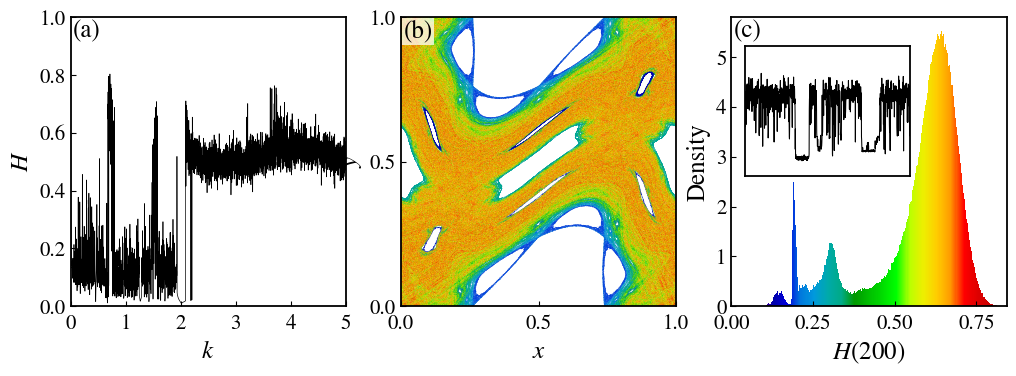

In [93]:
fontsize = 18
ps = PlotStyler(fontsize=fontsize, ticks_on_all_sides=False)
ps.apply_style()
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5))
[ps.set_tick_padding(ax[i], pad_x=6) for i in range(ax.shape[0])]

ax[0].plot(k, (HE[:, 0] + HE[:, 1]) / 2, "k", lw=0.5)
ax[0].set_xlim(k.min(), k.max())
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"$H$")

for i in range(points.shape[0]):
    ax[1].scatter(ts[i, :, 0], ts[i, :, 1], c=ftHE_avg[i] * np.ones(finite_time), cmap="nipy_spectral", s=0.05, edgecolors="none", vmin=0, vmax=ftHE_avg.max())
    
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$y$")
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 0.5, 1])

counts, bins, patches = ax[2].hist(ftHE_avg, bins="auto", edgecolor='none', density=True)
# Compute bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Normalize bin centers for colormap
norm = plt.Normalize(0, bin_centers.max())
colormap = cm.nipy_spectral  # You can choose any colormap you like

# Apply color based on bin center (x position)
for center, patch in zip(bin_centers, patches):
    color = colormap(norm(center))
    patch.set_facecolor(color)

ax[2].set_xlim(bins[0], bins[-1])
ax[2].set_xlabel(r"$H(200)$")
ax[2].set_ylabel("Density")
ax[2].set_xlim(0, ftHE_avg.max())

ax_ins = ax[2].inset_axes([0.05, 0.45, 0.6, 0.45])  # [left, bottom, width, height]
ii = np.arange(ftHE_avg.shape[0]) / 1e3
ax_ins.plot(ii, ftHE_avg, "k", lw=0.75)
ax_ins.set_xlim(1, 2)
ax_ins.set_ylim(0, 1)
ax_ins.set_yticks([])
ax_ins.set_xticks([])

xbox = 0.0095
ybox = 0.9318
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
for i in range(3):
    ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", bbox=bbox, transform=ax[i].transAxes)
plt.subplots_adjust(left=0.059, bottom=0.15, right=0.995, top=0.975, wspace=0.2, hspace=0.2)
plt.savefig("fig10.png", dpi=400)

# Periodic orbits and manifolds

In [3]:
ds = dds(model="standard map")

## Period 1

The period-1 orbits can be found analytically. They are $(x, y) = (0, 0)$ and $(x, y) = (0.5, 0.0)$. Let us check their stability.

In [ ]:
u = [0, 0]
period = 1
stability = ds.classify_stability(u, period, parameter=k)
stability["classification"], stability["eigenvalues"]

('saddle', array([3.18614066+0.j, 0.31385934+0.j]))

In [ ]:
u = [0.5, 0]
period = 1
stability = ds.classify_stability(u, period, parameter=k)
stability["classification"], stability["eigenvalues"]

('elliptic (quasi-periodic)', array([0.25-0.96824584j, 0.25+0.96824584j]))

For the manifolds

In [9]:
saddle = [0, 0]
n_points = 50000
iter_time = 12

In [ ]:
%%time
wu_period1 = ds.manifold(saddle, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="unstable")
ws_period1 = ds.manifold(saddle, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="stable")

CPU times: user 668 ms, sys: 32.3 ms, total: 700 ms
Wall time: 591 ms


## Period 2

Now for the period-2 orbit. We know that 

In [ ]:
periodic_orbit_center_p2 = [0.5, 0.5]
period = 2
stability = ds.classify_stability(periodic_orbit_center_p2, period, parameter=k)
stability["classification"], stability["eigenvalues"]

('elliptic (quasi-periodic)', array([-0.125+0.99215674j, -0.125-0.99215674j]))

In [13]:
x_range = (0.1, 0.3)
y_range = (0.3, 0.55)

period = 2
grid_size = 1000
tolerance = 2 / grid_size
x = np.linspace(x_range[0], x_range[1], grid_size)
y = np.linspace(y_range[0], y_range[1], grid_size)
X, Y = np.meshgrid(x, y)
grid_points = np.empty((grid_size, grid_size, 2), dtype=np.float64)
grid_points[:, :, 0] = X
grid_points[:, :, 1] = Y

In [ ]:
%%time
periodic_orbit_saddle_p2 = ds.find_periodic_orbit(grid_points, period, parameter=k, tolerance=tolerance, verbose=True, tolerance_decay_factor=0.5)

Iter 0: Δorbit=[0.19398951 0.38794242], Δbounds=[0.0006046  0.00075475], tol=2.00e-03
Iter 1: Δorbit=[6.97569804e-07 1.17822834e-05], Δbounds=[0.0013954  0.00124525], tol=1.00e-03
Iter 2: Δorbit=[1.30339304e-05 1.63665133e-07], Δbounds=[0.0002613  0.00024525], tol=5.00e-04
Iter 3: Δorbit=[4.37991944e-06 4.97719348e-06], Δbounds=[0.0002387  0.00025475], tol=2.50e-04
Iter 4: Δorbit=[2.51783269e-06 3.64189359e-06], Δbounds=[1.13033454e-05 4.75475475e-06], tol=1.25e-04
Iter 5: Δorbit=[5.20590344e-07 7.58901280e-06], Δbounds=[0.0001137  0.00012025], tol=6.25e-05
Iter 6: Δorbit=[2.05217904e-06 9.98578301e-06], Δbounds=[1.85330511e-05 2.07930027e-05], tol=3.13e-05
Iter 7: Δorbit=[5.93479191e-08 4.74338684e-08], Δbounds=[1.27169489e-05 1.04569973e-05], tol=1.56e-05
Iter 8: Δorbit=[5.55501459e-09 4.63855188e-09], Δbounds=[2.90805114e-06 5.16800271e-06], tol=7.81e-06
Iter 9: Δorbit=[1.13948853e-08 1.26565990e-08], Δbounds=[4.90444886e-06 2.65484364e-06], tol=3.91e-06
Iter 10: Δorbit=[1.20663627e

In [ ]:
periodic_orbit_saddle_p2, ds.classify_stability(periodic_orbit_saddle_p2, period, parameter=k)

(array([0.19397649, 0.38795298]),
 {'classification': 'saddle',
  'eigenvalues': array([4.09176343+0.j, 0.24439341+0.j]),
  'eigenvectors': array([[ 0.89240544+0.j, -0.69908845+0.j],
         [ 0.45123445+0.j,  0.7150352 +0.j]])})

In [ ]:
%%time
n_points = 50000
iter_time = 17
wu_period2 = ds.manifold(periodic_orbit_saddle_p2, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="unstable")
ws_period2 = ds.manifold(periodic_orbit_saddle_p2, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="stable")

CPU times: user 237 ms, sys: 9.48 ms, total: 246 ms
Wall time: 43.2 ms


## Period 3

There two period 3 period orbits. Let us find the lower one first.

### Lower period 3

For the center.

In [33]:
# Define the symmetry line
symmetry_line = lambda v, parameters: 0.5 * np.ones_like(v)
# Define the type of the function, i.e., x = g(y)
axis = 1
# Define the period
period = 3
# Define the range of the initial search
y_range = (0.2, 0.4)
# Define the number of points in the range
num_points = 10000
# Define the initial conditions
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [ ]:
%%time
periodic_orbit_center_period3_lower = ds.find_periodic_orbit(points, period, parameter=k, tolerance=tolerance, symmetry_line=symmetry_line, axis=axis, verbose=True, tolerance_decay_factor=0.8)

Iter 0: Δorbit=[0.5        0.38569857], Δbounds=[0.0004  0.00036], tol=2.00e-04
Iter 1: Δorbit=[0.00000000e+00 1.60214241e-06], Δbounds=[0.00032    0.00028364], tol=1.60e-04
Iter 2: Δorbit=[0. 0.], Δbounds=[0.000256   0.00022692], tol=1.28e-04
Iter 3: Δorbit=[0.00000000e+00 1.13473509e-08], Δbounds=[0.0002048  0.00018152], tol=1.02e-04
Iter 4: Δorbit=[0.00000000e+00 5.55111512e-17], Δbounds=[0.00016384 0.00014523], tol=8.19e-05
Iter 5: Δorbit=[0. 0.], Δbounds=[0.00013107 0.00011618], tol=6.55e-05
Iter 6: Δorbit=[0. 0.], Δbounds=[1.0485760e-04 9.2947534e-05], tol=5.24e-05
Iter 7: Δorbit=[0. 0.], Δbounds=[8.3886080e-05 7.4358005e-05], tol=4.19e-05
Iter 8: Δorbit=[0. 0.], Δbounds=[6.71088640e-05 5.94864062e-05], tol=3.36e-05
Iter 9: Δorbit=[0. 0.], Δbounds=[5.36870912e-05 4.75891248e-05], tol=2.68e-05
Iter 10: Δorbit=[0. 0.], Δbounds=[4.29496730e-05 3.80712998e-05], tol=2.15e-05
Iter 11: Δorbit=[0.00000000e+00 5.55111512e-17], Δbounds=[3.43597384e-05 3.04570399e-05], tol=1.72e-05
Iter 12:

In [ ]:
periodic_orbit_center_period3_lower, ds.classify_stability(periodic_orbit_center_period3_lower, period, parameter=k)

(array([0.5       , 0.38569696]),
 {'classification': 'elliptic (quasi-periodic)',
  'eigenvalues': array([-0.93105758-0.36487228j, -0.93105758+0.36487228j]),
  'eigenvectors': array([[-0.31198762+0.06967997j, -0.31198762-0.06967997j],
         [ 0.94752753+0.j        ,  0.94752753+0.j        ]])})

For the saddle

In [36]:
# Define the symmetry line
symmetry_line = lambda v, parameters: 0.0 * np.ones_like(v)
# Define the type of the function, i.e., x = g(y)
axis = 1
# Define the period
period = 3
# Define the range of the initial search
y_range = (0.2, 0.3)
# Define the number of points in the range
num_points = 10000
# Define the initial conditions
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [ ]:
%%time
periodic_orbit_saddle_period3_lower = ds.find_periodic_orbit(points, period, parameter=k, tolerance=tolerance, symmetry_line=symmetry_line, axis=axis, verbose=True, tolerance_decay_factor=0.8)

Iter 0: Δorbit=[0.         0.25381538], Δbounds=[0.0004     0.00033999], tol=2.00e-04
Iter 1: Δorbit=[0.00000000e+00 9.11275046e-06], Δbounds=[0.00032    0.00026407], tol=1.60e-04
Iter 2: Δorbit=[0.00000000e+00 5.61195081e-06], Δbounds=[0.000256   0.00021126], tol=1.28e-04
Iter 3: Δorbit=[0.00000000e+00 4.46865611e-06], Δbounds=[0.0002048  0.00016901], tol=1.02e-04
Iter 4: Δorbit=[0.00000000e+00 3.57488714e-06], Δbounds=[0.00016384 0.00013521], tol=8.19e-05
Iter 5: Δorbit=[0.00000000e+00 2.86667714e-06], Δbounds=[0.00013107 0.00010815], tol=6.55e-05
Iter 6: Δorbit=[0.00000000e+00 2.29305393e-06], Δbounds=[1.04857600e-04 8.65239849e-05], tol=5.24e-05
Iter 7: Δorbit=[0.00000000e+00 1.83449193e-06], Δbounds=[8.38860800e-05 6.92187978e-05], tol=4.19e-05
Iter 8: Δorbit=[0.00000000e+00 1.46758527e-06], Δbounds=[6.71088640e-05 5.53751044e-05], tol=3.36e-05
Iter 9: Δorbit=[0.00000000e+00 1.17130059e-06], Δbounds=[5.36870912e-05 4.43056104e-05], tol=2.68e-05
Iter 10: Δorbit=[0.00000000e+00 9.41

In [ ]:
periodic_orbit_saddle_period3_lower, ds.classify_stability(periodic_orbit_saddle_period3_lower, period, parameter=k)

(array([0.        , 0.25377828]),
 {'classification': 'saddle',
  'eigenvalues': array([5.90789859+0.j, 0.16926492+0.j]),
  'eigenvectors': array([[ 0.84347661+0.j,  0.94680784+0.j],
         [ 0.53716591+0.j, -0.32179949+0.j]])})

### Upper period 3

For the center

In [39]:
# Define the symmetry line
symmetry_line = lambda v, parameters: 0.5 * np.ones_like(v)
# Define the type of the function, i.e., x = g(y)
axis = 1
# Define the period
period = 3
# Define the range of the initial search
y_range = (0.55, 0.65)
# Define the number of points in the range
num_points = 10000
# Define the initial conditions
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [ ]:
%%time
periodic_orbit_center_period3_upper = ds.find_periodic_orbit(points, period, parameter=k, tolerance=tolerance, symmetry_line=symmetry_line, axis=axis, verbose=True, tolerance_decay_factor=0.7)

Iter 0: Δorbit=[0.5        0.61430143], Δbounds=[0.0004  0.00037], tol=2.00e-04
Iter 1: Δorbit=[0.00000000e+00 1.60964791e-06], Δbounds=[0.00028    0.00024818], tol=1.40e-04
Iter 2: Δorbit=[0.00000000e+00 1.11022302e-16], Δbounds=[0.000196   0.00017374], tol=9.80e-05
Iter 3: Δorbit=[0. 0.], Δbounds=[0.0001372  0.00012161], tol=6.86e-05
Iter 4: Δorbit=[0.00000000e+00 1.11022302e-16], Δbounds=[9.60400000e-05 8.51301066e-05], tol=4.80e-05
Iter 5: Δorbit=[0. 0.], Δbounds=[6.72280000e-05 5.95910657e-05], tol=3.36e-05
Iter 6: Δorbit=[0.00000000e+00 1.11022302e-16], Δbounds=[4.70596000e-05 4.17137468e-05], tol=2.35e-05
Iter 7: Δorbit=[0.0000000e+00 4.1717918e-09], Δbounds=[3.29417200e-05 2.91996227e-05], tol=1.65e-05
Iter 8: Δorbit=[0.00000000e+00 2.92025426e-09], Δbounds=[2.30592040e-05 2.04397359e-05], tol=1.15e-05
Iter 9: Δorbit=[0.00000000e+00 2.04417816e-09], Δbounds=[1.61414428e-05 1.43078151e-05], tol=8.07e-06
Iter 10: Δorbit=[0.00000000e+00 1.43092482e-09], Δbounds=[1.12990100e-05 1.0

In [ ]:
periodic_orbit_center_period3_upper, ds.classify_stability(periodic_orbit_center_period3_upper, period, parameter=k)

(array([0.5       , 0.61430304]),
 {'classification': 'elliptic (quasi-periodic)',
  'eigenvalues': array([-0.93105758+0.36487228j, -0.93105758-0.36487228j]),
  'eigenvectors': array([[-0.31198762-0.06967997j, -0.31198762+0.06967997j],
         [ 0.94752753+0.j        ,  0.94752753+0.j        ]])})

Now for the saddle

In [42]:
# Define the symmetry line
symmetry_line = lambda v, parameters: 0.0 * np.ones_like(v)
# Define the type of the function, i.e., x = g(y)
axis = 1
# Define the period
period = 3
# Define the range of the initial search
y_range = (0.65, 0.8)
# Define the number of points in the range
num_points = 10000
# Define the initial conditions
points = np.linspace(y_range[0], y_range[1], num_points)
tolerance = 2 / num_points

In [ ]:
%%time
periodic_orbit_saddle_period3_upper = ds.find_periodic_orbit(points, period, parameter=k, tolerance=tolerance, symmetry_line=symmetry_line, axis=axis, verbose=True, tolerance_decay_factor=0.7)

Iter 0: Δorbit=[0.         0.74625713], Δbounds=[0.0004   0.000355], tol=2.00e-04
Iter 1: Δorbit=[0.00000000e+00 1.09172033e-05], Δbounds=[0.00028    0.00023108], tol=1.40e-04
Iter 2: Δorbit=[0.00000000e+00 7.34897484e-06], Δbounds=[0.000196   0.00016173], tol=9.80e-05
Iter 3: Δorbit=[0.00000000e+00 5.14346138e-06], Δbounds=[0.0001372  0.00011321], tol=6.86e-05
Iter 4: Δorbit=[0.00000000e+00 3.60054473e-06], Δbounds=[9.60400000e-05 7.92487804e-05], tol=4.80e-05
Iter 5: Δorbit=[0.00000000e+00 2.52036325e-06], Δbounds=[6.72280000e-05 5.54742305e-05], tol=3.36e-05
Iter 6: Δorbit=[0.00000000e+00 1.76425696e-06], Δbounds=[4.70596000e-05 3.88319489e-05], tol=2.35e-05
Iter 7: Δorbit=[0.00000000e+00 1.23497947e-06], Δbounds=[3.2941720e-05 2.7182366e-05], tol=1.65e-05
Iter 8: Δorbit=[0.00000000e+00 8.64485689e-07], Δbounds=[2.3059204e-05 1.9027656e-05], tol=1.15e-05
Iter 9: Δorbit=[0.00000000e+00 6.04188496e-07], Δbounds=[1.61414428e-05 1.33212622e-05], tol=8.07e-06
Iter 10: Δorbit=[0.00000000e

In [ ]:
periodic_orbit_saddle_period3_upper, ds.classify_stability(periodic_orbit_saddle_period3_upper, period, parameter=k)

(array([0.        , 0.74622172]),
 {'classification': 'saddle',
  'eigenvalues': array([5.90789859+0.j, 0.16926492+0.j]),
  'eigenvectors': array([[ 0.84347661+0.j,  0.94680784+0.j],
         [ 0.53716591+0.j, -0.32179949+0.j]])})

### Now the manifolds

In [ ]:
%%time
n_points = 50000
iter_time = 18
wu_period3_lower = ds.manifold(periodic_orbit_saddle_period3_lower, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="unstable")
ws_period3_lower = ds.manifold(periodic_orbit_saddle_period3_lower, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="stable")

CPU times: user 234 ms, sys: 6.59 ms, total: 240 ms
Wall time: 39.7 ms


In [ ]:
%%time
n_points = 50000
iter_time = 18
wu_period3_upper = ds.manifold(periodic_orbit_saddle_period3_upper, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="unstable")
ws_period3_upper = ds.manifold(periodic_orbit_saddle_period3_upper, period, parameter=k, n_points=n_points, iter_time=iter_time, stability="stable")

CPU times: user 252 ms, sys: 7.92 ms, total: 260 ms
Wall time: 48.9 ms


## Final plot

In [147]:
num_ic = 100
total_time = 30000
np.random.seed(11331313)
u = np.random.rand(num_ic, 2)
k = 1.5
trajectories = ds.trajectory(u, k, total_time)

<Figure size 640x480 with 0 Axes>

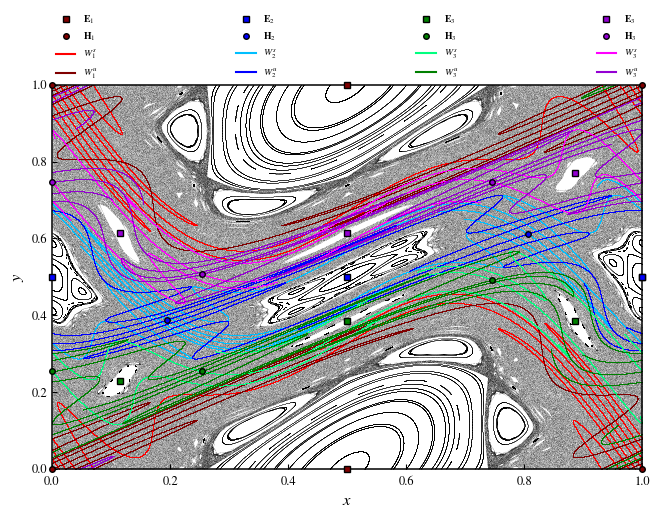

In [ ]:
ps = PlotStyler(fontsize=12, legend_fontsize=7, axes_linewidth=1.1)
ps.apply_style()
fig, ax = plt.subplots()
ps.set_tick_padding(ax, pad_x=5)
plt.plot(trajectories[:, 0].T, trajectories[:, 1], "ko", markersize=0.1, markeredgewidth=0.0)
ms = 0.75
pms = 4

plt.plot(0.5, 0, "s", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon", label=r"$\mathbf{E}_1$")
plt.plot(0.5, 1, "s", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon")
plt.plot(0, 0, "o", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon", label=r"$\mathbf{H}_1$")
plt.plot(0, 1, "o", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon")
plt.plot(1, 0, "o", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon")
plt.plot(1, 1, "o", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="maroon")

plt.plot(0, 0, "r", label="$W^s_1$")
plt.plot(0, 0, label="$W^u_1$", color="maroon")

plt.plot(ws_period1[0][:, 0], ws_period1[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="red") # along v
plt.plot(ws_period1[1][:, 0], ws_period1[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="red") # along -v
plt.plot(wu_period1[0][:, 0], wu_period1[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="maroon") # along v
plt.plot(wu_period1[1][:, 0], wu_period1[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="maroon") # along -v

ts = ds.trajectory(periodic_orbit_center_p2, k, 2)
plt.plot(ts[:, 0], ts[:, 1], "bs", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, label=r"$\mathbf{E}_2$")
plt.plot(1, 0.5 , "bs", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3)
ts = ds.trajectory(periodic_orbit_saddle_p2, k, 2)
plt.plot(ts[:, 0], ts[:, 1], "bo", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, label=r"$\mathbf{H}_2$")

plt.plot(ws_period2[0][:, 0], ws_period2[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="deepskyblue") # along v
plt.plot(ws_period2[1][:, 0], ws_period2[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="deepskyblue") # along -v
plt.plot(wu_period2[0][:, 0], wu_period2[0][:, 1], "bo", markersize=ms, markeredgewidth=0.0) # along v
plt.plot(wu_period2[1][:, 0], wu_period2[1][:, 1], "bo", markersize=ms, markeredgewidth=0.0) # along -v

plt.plot(0, 0, label="$W^s_2$", color="deepskyblue")
plt.plot(0, 0, label="$W^u_2$", color="blue")

ts = ds.trajectory(periodic_orbit_center_period3_lower, k, 3)
plt.plot(ts[:, 0], ts[:, 1], "gs", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, label=r"$\mathbf{E}_3$")
plt.plot(1, 0.5 , "bs", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3)
ts = ds.trajectory(periodic_orbit_saddle_period3_lower, k, 3)
plt.plot(ts[:, 0], ts[:, 1], "go", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, label=r"$\mathbf{H}_3$")

plt.plot(ws_period3_lower[0][:, 0], ws_period3_lower[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="springgreen") # along v
plt.plot(ws_period3_lower[1][:, 0], ws_period3_lower[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="springgreen") # along -v
plt.plot(wu_period3_lower[0][:, 0], wu_period3_lower[0][:, 1], "go", markersize=ms, markeredgewidth=0.0) # along v
plt.plot(wu_period3_lower[1][:, 0], wu_period3_lower[1][:, 1], "go", markersize=ms, markeredgewidth=0.0) # along -v

plt.plot(0, 0, label="$W^s_3$", color="springgreen")
plt.plot(0, 0, label="$W^u_3$", color="green")

ts = ds.trajectory(periodic_orbit_center_period3_upper, k, 3)
plt.plot(ts[:, 0], ts[:, 1], "s", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="darkviolet", label=r"$\mathbf{E}_3$")
ts = ds.trajectory(periodic_orbit_saddle_period3_upper, k, 3)
plt.plot(ts[:, 0], ts[:, 1], "o", markersize=pms, markeredgecolor="k", clip_on=False, zorder=3, color="darkviolet", label=r"$\mathbf{H}_3$")

plt.plot(ws_period3_upper[0][:, 0], ws_period3_upper[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="fuchsia") # along v
plt.plot(ws_period3_upper[1][:, 0], ws_period3_upper[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="fuchsia") # along -v
plt.plot(wu_period3_upper[0][:, 0], wu_period3_upper[0][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="darkviolet") # along v
plt.plot(wu_period3_upper[1][:, 0], wu_period3_upper[1][:, 1], "o", markersize=ms, markeredgewidth=0.0, color="darkviolet") # along -v

plt.plot(0, 0, label="$W^s_3$", color="fuchsia")
plt.plot(0, 0, label="$W^u_3$", color="darkviolet")

# plt.legend(loc="upper center", fontsize=8, frameon=False, handlelength=1.5, handletextpad=0.5, borderpad=0.5, bbox_to_anchor=(0.5, 1.5), ncol=4)
plt.legend(bbox_to_anchor=(0, 1.0, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4, frameon=False, fancybox=False)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.subplots_adjust(left=0.065, bottom=0.08, right=0.987, top=0.88, wspace=0.2, hspace=0.2)
plt.savefig("fig11.png", dpi=400)

# Escape

## Survival probability

In [96]:
ds = dds(model="leonel map")

In [103]:
eps, gamma = 1e-3, 1
parameters = [eps, gamma]

In [188]:
total_time = 5000000
u = [np.pi, 1e-15]
trajectory = ds.trajectory(u, total_time, parameters=parameters)

In [97]:
ds.info["parameters"]

['eps', 'gamma']

In [116]:

max_time = 1000000
num_ic = 1000000
np.random.seed(13)
x_range = (0, 2 * np.pi, num_ic)
y_range = (-1e-14, 1e-14, num_ic)
x = np.random.uniform(*x_range)
y = np.random.uniform(*y_range)
y_esc = np.logspace(np.log10(1e-3), np.log10(0.025), 25)
x_esc = (0, 2 * np.pi)
sp, times = [], []

In [117]:
%%time
for i in range(y_esc.shape[0]):
    exit = np.array([[x_esc[0], x_esc[1]], [-y_esc[i], y_esc[i]]])
    escape = np.array(Parallel(n_jobs=-1)(delayed(ds.escape_analysis)([x[j], y[j]], max_time, exit, parameters=parameters, escape="exiting") for j in range(num_ic)))
    time, survival_probability = ds.survival_probability(escape[:, 1], escape[:, 1].max())
    times.append(time)
    sp.append(survival_probability)


CPU times: user 5min 51s, sys: 5.32 s, total: 5min 56s
Wall time: 7min 54s


In [121]:
colors = sns.color_palette("icefire", len(y_esc))
cmap = ListedColormap(colors)
Y_esc = np.array(y_esc)
norm = mpl.colors.Normalize(vmin=min(Y_esc), vmax=max(Y_esc))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

<Figure size 640x480 with 0 Axes>

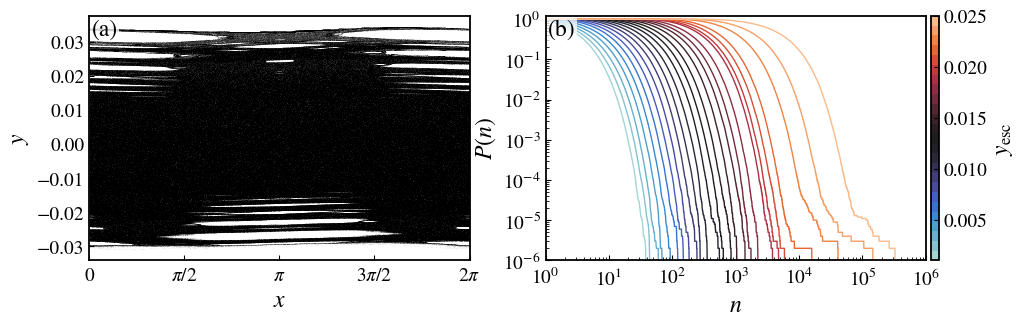

In [191]:
fontsize=17
ps = PlotStyler(fontsize=fontsize, ticks_on_all_sides=False, markersize=0.1, markeredgewidth=0)
ps.apply_style()

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
[ps.set_tick_padding(ax[i], pad_x=5) for i in range(ax.shape[0])]
plt.subplots_adjust(left=0.075, bottom=0.16, right=1.065, top=0.975)

ax[0].plot(trajectory[:, 0], trajectory[:, 1], "ko")
ax[0].set_xlim(0, 2 * np.pi)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_xticks([0, np.pi/2, np.pi, 3 * np.pi /2, 2 * np.pi], [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
ax[0].set_yticks([-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])

for i in range(y_esc.shape[0]):
    ax[1].plot(times[i], sp[i], color=colors[i])
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_ylim(1 / num_ic, 1.2e0)
ax[1].set_xlim(1e0, 1e6)
ax[1].set_xlabel("$n$")
ax[1].set_ylabel("$P(n)$")
fig.colorbar(sm, ax=ax, pad=0.005, aspect=30, label=r"$y_{\mathrm{esc}}$")


xbox = 0.0066
ybox = 0.923
bbox = {"facecolor": "w", "pad": 1, "alpha": 0.75, "linewidth": 0.0}
[ax[i].text(xbox, ybox, f"({ascii_lowercase[i]})", transform=ax[i].transAxes, bbox=bbox) for i in range(ax.shape[0])]

plt.savefig("fig12.png", dpi=400)

## Escape basins

In [6]:
from numba import njit

In [7]:
@njit
def weiss_map(u, parameters):
    k = parameters[0]
    x, y = u
    y_new = y - k * np.sin(x)
    x_new = (x + k * (y_new ** 2 - 1) + np.pi) % (2 * np.pi) - np.pi

    return np.array([x_new, y_new])

In [8]:
ds = dds(mapping=weiss_map, system_dimension=2, number_of_parameters=1)

In [38]:
import numpy as np

centers = np.array([[0.0, -1.1],
                    [np.pi - 0.1, 1.0]], dtype=np.float64)
size_exit = 0.2

In [39]:
ks = [0.5, 0.55, 0.60, 0.70]
total_time = 10000

In [40]:
grid_size = 1000
x_range = (-np.pi, np.pi, grid_size)
y_range = (-np.pi, np.pi, grid_size)
X = np.linspace(*x_range)
Y = np.linspace(*y_range)

In [41]:
from joblib import Parallel, delayed
import itertools

In [42]:
escapes = np.zeros((len(ks), grid_size, grid_size, 2))

In [43]:
%%time
for i, k in enumerate(ks):
    
    escape = Parallel(n_jobs=-1)(
        delayed(ds.escape_analysis)([x, y], total_time, centers, parameters=k, hole_size=size_exit)
        for x, y in itertools.product(X, Y)
    )
    escape = np.array(escape).reshape(grid_size, grid_size, 2)

    escapes[i, :, :, :] = escape

CPU times: user 55.1 s, sys: 1.37 s, total: 56.4 s
Wall time: 3min 39s


In [44]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

In [45]:
colors = ["green", "gold", "blue"]
cmap = ListedColormap(colors)
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = BoundaryNorm(boundaries=bounds, ncolors=len(colors))

<Figure size 640x480 with 0 Axes>

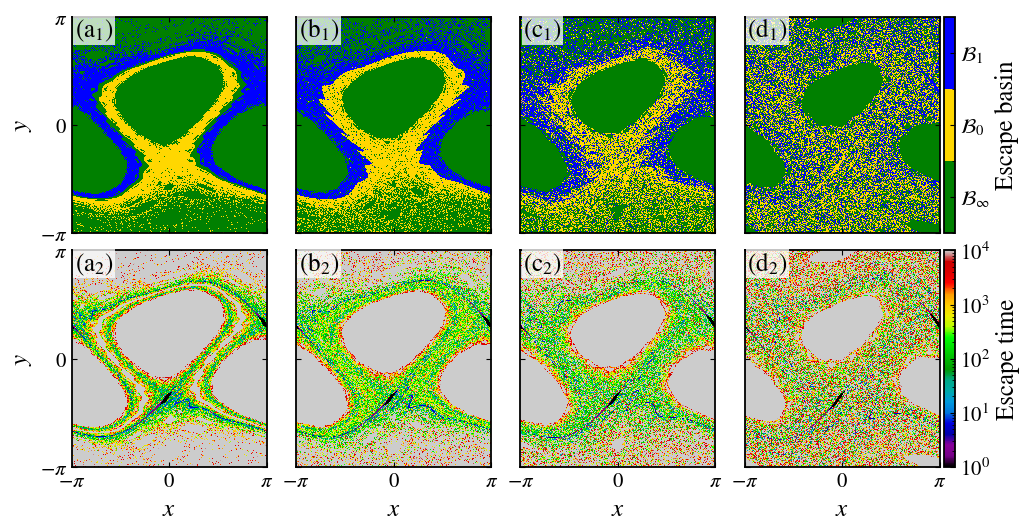

In [46]:
ps = PlotStyler(fontsize=18)
ps.apply_style()
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
# plt.tight_layout(pad=0)
plt.subplots_adjust(left=0.055, bottom=0.095, top=0.995, right=0.945, hspace=0.08, wspace=0.15)

x_grid, y_grid = np.meshgrid(X, Y, indexing='ij')
for i, k in enumerate(ks):
    hm1 = ax[0, i].pcolormesh(x_grid, y_grid, escapes[i, :, :, 0], cmap=cmap, norm=norm)
    hm2 = ax[1, i].pcolormesh(x_grid, y_grid, escapes[i, :, :, 1], cmap="nipy_spectral", norm=mpl.colors.LogNorm(vmin=1e0, vmax=total_time))
    ax[1, i].set_xlabel(r"$x$")

ax[0, 0].set_ylabel(r"$y$")
ax[1, 0].set_ylabel(r"$y$")
ax[0, 0].set_xticks([-np.pi, 0,  np.pi])
ax[0, 0].set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
ax[0, 0].set_yticks([-np.pi, 0, np.pi])
ax[0, 0].set_yticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
ax[0, 0].set_xlim(-np.pi, np.pi)
ax[0, 0].set_ylim(-np.pi, np.pi)
cbar1 = fig.colorbar(hm1, ax=ax[0, :], aspect=20, pad=0.005, fraction=0.02)
cbar1.set_label(r"Escape basin")
cbar1.set_ticks([-1, 0, 1])
cbar1.set_ticklabels([r"$\mathcal{B}_\infty$", r"$\mathcal{B}_0$", r"$\mathcal{B}_1$"])

cbar2 = fig.colorbar(hm2, ax=ax[1, :], aspect=20, pad=0.005, fraction=0.02)
cbar2.set_label(r"Escape time")

xbox = 0.0143
ybox = 0.908
bbox = {"facecolor": "w", "alpha": 0.75, "linewidth": 0.0, "pad": 1}
for i in range(4):
    ax[0, i].text(xbox, ybox, f"({ascii_lowercase[i]}$_1$)", transform=ax[0, i].transAxes, bbox=bbox)
    ax[1, i].text(xbox, ybox, f"({ascii_lowercase[i]}$_2$)", transform=ax[1, i].transAxes, bbox=bbox)

plt.savefig("fig13.png", dpi=400)

In [63]:
ks = np.linspace(0.2, 1.0, 100)
escape_basins = np.zeros((len(ks), grid_size, grid_size))
total_time = 10000
Sb = []
Sbb = []
D = []

In [ ]:
from pynamicalsys import BasinMetrics

In [65]:
x_grid, y_grid = np.meshgrid(X, Y, indexing="ij")

In [ ]:
%%time
for i, k in enumerate(ks):
    
    escape = Parallel(n_jobs=-1)(
        delayed(ds.escape_analysis)([x, y], total_time, centers, parameters=k, hole_size=size_exit)
        for x, y in itertools.product(X, Y)
    )
    escape = np.array(escape).reshape(grid_size, grid_size, 2)
    escape_basins[i] = escape[:, :, 0]

    bm = BasinMetrics(escape[:, :, 0])
    basin_entropy = bm.basin_entropy(5, log_base=2)
    Sb.append(basin_entropy[0])
    Sbb.append(basin_entropy[1])
    eps, f = bm.uncertainty_fraction(x_grid, y_grid, )
    alpha, _ = np.polyfit(np.log(eps), np.log(f), 1)
    D.append(2 - alpha)

In [66]:
import pandas as pd

In [68]:
for i, k in enumerate(ks):
    df = f"escape_basin_i={i}.dat"
    df = pd.read_csv(df, header=None, sep=r"\s+")
    escape_basins[i] = np.array(df[2]).reshape(grid_size, grid_size)

In [69]:
for i, k in enumerate(ks):
    bm = BasinMetrics(escape_basins[i, :, :])
    basin_entropy = bm.basin_entropy(5, log_base=2)
    Sb.append(basin_entropy[0])
    Sbb.append(basin_entropy[1])
    eps, f = bm.uncertainty_fraction(x_grid, y_grid, )
    alpha, _ = np.polyfit(np.log(eps), np.log(f), 1)
    D.append(2 - alpha)

In [70]:
array = escape_basins.reshape(len(ks), grid_size ** 2)
prob_0 = np.sum(array == -1, axis=1) / (grid_size ** 2)
prob_1 = np.sum(array == 0, axis=1) / (grid_size ** 2)
prob_2 = np.sum(array == 1, axis=1) / (grid_size ** 2)

<Figure size 640x480 with 0 Axes>

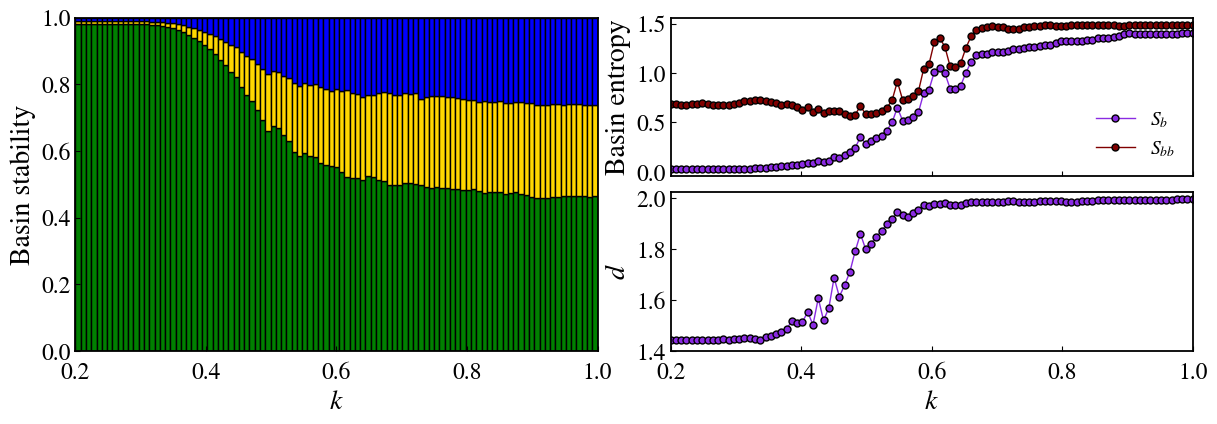

In [71]:
ps = PlotStyler(ticks_on_all_sides=False)
ps.apply_style()

# Create figure
fig = plt.figure(figsize=(12, 4))

gs = gridspec.GridSpec(2, 2)

ax = []
ax.append(fig.add_subplot(gs[:, 0]))
ax.append(fig.add_subplot(gs[0, 1]))
ax.append(fig.add_subplot(gs[1, 1]))
ps.set_tick_padding(ax[0], pad_x=8)
ps.set_tick_padding(ax[2], pad_x=8)

width = ks[1] - ks[0]
ax[0].bar(ks, prob_0, label='State 0', linewidth=1., edgecolor='black', width=width, align='edge', color="green")
ax[0].bar(ks, prob_1, bottom=prob_0, label='State 1', linewidth=1., edgecolor='black', width=width, align='edge', color="gold")
ax[0].bar(ks, prob_2, bottom=prob_0 + prob_1, label='State 2', linewidth=1., edgecolor='black', width=width, align='edge', color="blue")
ax[0].set_xlim(0, 1)
ax[0].set_xlabel("$k$")
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("Basin stability")

ax[1].plot(ks, Sb, "o-", color="blueviolet", label="$S_b$")
ax[1].plot(ks, Sbb, "o-", color="maroon", label="$S_{bb}$")
ax[1].set_ylabel("Basin entropy")
ax[1].legend(loc="lower right", frameon=False)
ax[1].set_xticklabels([])
ax[1].set_yticks([0, 0.5, 1, 1.5])

ax[2].plot(ks, D, "o-", color="blueviolet")
ax[2].set_ylabel("$d$")
ax[2].set_xlabel("$k$")
ax[2].set_yticks([1.4, 1.6, 1.8, 2])

[ax[i].set_xlim(min(ks), max(ks)) for i in range(len(ax))]

plt.subplots_adjust(left=0.056, bottom=0.145, right=0.987, top=0.978, wspace=0.14, hspace=0.1)

plt.savefig("fig14.png", dpi=400)